# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Inverse Problem

A simple inverse problem is (for $1 < x < 0$):

$$
\begin{align*}
Ku(x) &= \int_0^x u(y) \mathrm{d}y
\\[0.4cm]
&= \int_0^{1} u(y)H(x-y)\mathrm{d}y
\end{align*}
$$

Where $H$ is the Heaviside step function. We can easily verify that the solution to $f(x) = Ku(x)$ is given by $u(x) = f'(x)$.

Upon discretisation with stepsize $h = 1/n$, the inverse problem can be cast as a system of $n$ equations in $n$ unknowns

$$Ku = f$$

You can use the code provided below to generate the matrix and noisy data for a given $u(x)$.

1. Compute the SVD of $K$ (using `np.linalg.svd`) and plot the singular values and vectors. What do they look like?

2. Plot the coefficients $\langle u_i, f\rangle$ and the singular values $\sigma_i$ to check the discrete Picard condition. What do you notice ?

3. Solve the inverse problem for noisy data using the (regularised) pseudo-inverse; compute the optimal $\alpha$ by computing the bias and variance components of the error. How does the optimal $\alpha$ depend on the noise level? Is this a practically feasible way to compute the optimal $\alpha$?

4. Compare the solutions for $\alpha < \alpha_{opt}$ and $\alpha > \alpha_{opt}$ to the ground truth. What do you notice?

In [ ]:
def getK(n):
    h = 1/n
    x = np.linspace(h/2, 1-h/2, n)
    xx, yy = np.meshgrid(x, x)
    K = np.heaviside(xx - yy, 1)
    
    return K, x

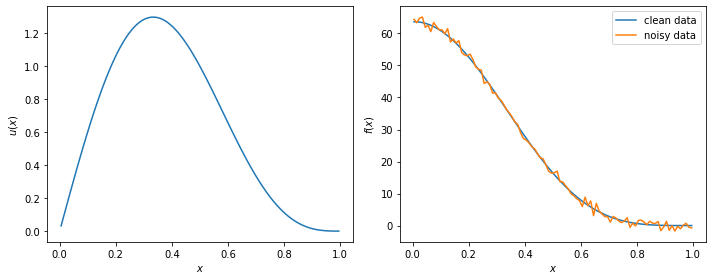

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# define forward operator
n = 100
delta = 1
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot ground truth and data
fig, axs = plt.subplots(1,2)

axs[0].plot(x,u)
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$u(x)$')

axs[1].plot(x,f,label='clean data')
axs[1].plot(x,f_delta,label='noisy data')

axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$f(x)$')
axs[1].legend()

fig.set_figwidth(10)
fig.tight_layout()
plt.show()